In [73]:
"https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"

'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv'

In [74]:
import numpy as np
import pandas as pd

## Basic DataFrame

Consider the following Python dictionary data and Python list labels:

```
data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}
```
```
labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
```

### `Q-1:`
i. Create a DataFrame birds from the above dictionary data which has the index labels.

ii. Display basic information about the dataFrame.

iii. Show Alternate rows of the dataframe.

In [75]:
# code here

# i) Create a DataFrame birds from the above dictionary data which has the index labels.

data = {'birds': ['Cranes', 'Cranes', 'plovers', 'spoonbills', 'spoonbills', 'Cranes', 'plovers', 'Cranes', 'spoonbills', 'spoonbills', 'Cranes'],
        'age': [3.5, 4, 1.5, np.nan, 6, 3, 5.5, np.nan, 8, 4, 3.5], 'visits': [2, 4, 3, 4, 3, 4, 2, 2, 3, 2, 2],
        'priority': ['yes', 'yes', 'no', np.nan, 'no', 'no', 'no', 'yes', 'no', 'no','yes']}

labels = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']

birds = pd.DataFrame(data, index = labels)
print(birds)


        birds  age  visits priority
a      Cranes  3.5       2      yes
b      Cranes  4.0       4      yes
c     plovers  1.5       3       no
d  spoonbills  NaN       4      NaN
e  spoonbills  6.0       3       no
f      Cranes  3.0       4       no
g     plovers  5.5       2       no
h      Cranes  NaN       2      yes
i  spoonbills  8.0       3       no
j  spoonbills  4.0       2       no
k      Cranes  3.5       2      yes


In [76]:
# ii) Display basic information about the dataFrame.
birds.info()
birds.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 11 entries, a to k
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   birds     11 non-null     object 
 1   age       9 non-null      float64
 2   visits    11 non-null     int64  
 3   priority  10 non-null     object 
dtypes: float64(1), int64(1), object(2)
memory usage: 440.0+ bytes


,age,visits
count,9.000000,11.000000
mean,4.333333,2.818182
std,1.903943,0.873863
min,1.500000,2.000000
25%,3.500000,2.000000
50%,4.000000,3.000000
75%,5.500000,3.500000
max,8.000000,4.000000


In [77]:
# iii) Show Alternate rows of the dataframe.

birds.iloc[::2]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
i,spoonbills,8.0,3,no
k,Cranes,3.5,2,yes


### `Q-2:`
i. Show only rows [1st, 3rd, 7th] from columns ['birds', 'age']

ii. Select rows where the number of visits is less than 4.

In [78]:
# code here

# i. Show only rows [1st, 3rd, 7th] from columns ['birds', 'age']

birds[['birds','age']].iloc[[0,2,6]]

,birds,age
a,Cranes,3.5
c,plovers,1.5
g,plovers,5.5


In [79]:
# ii. Select rows where the number of visits is less than 4.

birds[birds.visits < 4]

,birds,age,visits,priority
a,Cranes,3.5,2,yes
c,plovers,1.5,3,no
e,spoonbills,6.0,3,no
g,plovers,5.5,2,no
h,Cranes,NaN,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no
k,Cranes,3.5,2,yes


### `Q-3:`
i. Select all rows with nan values in age and visits column.

ii. Fill nan with respective series mode value.

In [80]:
# code here

# i. Select all rows with nan values in age and visits column.
birds[birds[['age','visits']].isnull().any(axis = 1)]


,birds,age,visits,priority
d,spoonbills,NaN,4,NaN
h,Cranes,NaN,2,yes


In [ ]:
# ii. Fill nan with respective series mode value.
birds['age'] = birds['age'].fillna(birds.age.mode()[0])

birds['visits'] = birds['visits'].fillna(birds.visits.mode()[0])

birds['priority'] = birds['priority'].fillna(birds['priority'].mode()[0])


In [89]:
birds

,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,3.5,4,no
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
h,Cranes,3.5,2,yes
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


### 🔴 **Understanding the `SettingWithCopyWarning` in Pandas**  

This warning occurs when **you try to modify a DataFrame or Series that might be a copy instead of the original data**.  

---

### 🔹 **Why Does It Happen?**
Pandas sometimes creates a **view** (a reference to the original data) or a **copy** (a completely new object) when performing operations. The problem is that it's unclear whether changes to the view will affect the original DataFrame.

#### ⚠ **Chained Assignment Problem**
Your code:
```python
birds.age.fillna(birds.age.mode()[0], inplace=True)
```
can be interpreted by Pandas in two steps:

1. `birds.age` → This **might return a copy** of the column instead of a direct reference.
2. `.fillna(birds.age.mode()[0], inplace=True)` → Since `birds.age` might be a copy, changing it **does not always modify** the original DataFrame.

Because of this, Pandas **warns you that the modification might not be applied to the original DataFrame**.

---

### 🔍 **Example of a Problematic Chained Assignment**
```python
df = pd.DataFrame({'A': [1, 2, np.nan, 4]})

df.A.fillna(0, inplace=True)  # Might not modify df correctly
```
Here, `df.A` **might return a copy**, so `fillna(inplace=True)` does not necessarily affect `df`.

---

### ✅ **How to Fix It?**
Instead of:
```python
birds.age.fillna(birds.age.mode()[0], inplace=True)
birds.visits.fillna(birds.visits.mode()[0], inplace=True)
```
Use:
```python
birds['age'] = birds['age'].fillna(birds['age'].mode()[0])
birds['visits'] = birds['visits'].fillna(birds['visits'].mode()[0])
birds['priority'] = birds['priority'].fillna(birds['priority'].mode()[0])
```
✔ This explicitly modifies the original DataFrame.  

---

### 🔹 **Key Takeaways**
1. **Avoid modifying slices of a DataFrame directly**.
2. **Use `df['column'] = ...` instead of `df.column = ...`** to ensure changes apply to the original DataFrame.
3. **`.fillna(..., inplace=True)` may not work on a copy**, so it's safer to **assign the result back**.

---

### 🔥 **Want to Check if a Column is a Copy or a View?**
```python
birds.age.is_view = birds.age._is_view  # True means it's a view, False means it's a copy
```
This can help you debug whether a column is linked to the original DataFrame.

Let me know if anything is unclear! 🚀

### `Q-4`
i. Find the total number of visits of the bird Cranes

ii. Find the number of each type of birds in dataframe.

iii. Print no of duplicate rows

iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.

In [111]:
# code here

# i. Find the total number of visits of the bird Cranes
total_visits = birds[birds['birds'] == "Cranes"].visits.sum()
print(total_visits)

# ii. Find the number of each type of birds in dataframe.
bird_count = birds['birds'].value_counts()
print('Count of Each Bird Type : \n{}'.format(bird_count))


# iii. Print no of duplicate rows
duplicate_row_count = birds.duplicated().sum()
print('No. of Duplicate Rows : {}'.format(duplicate_row_count))


# iv. Drop Duplicates rows and make this changes permanent. Show dataframe after changes.
birds.drop_duplicates(inplace = True)
birds

10
Count of Each Bird Type : 
birds
spoonbills    4
Cranes        3
plovers       2
Name: count, dtype: int64
No. of Duplicate Rows : 0


,birds,age,visits,priority
a,Cranes,3.5,2,yes
b,Cranes,4.0,4,yes
c,plovers,1.5,3,no
d,spoonbills,3.5,4,no
e,spoonbills,6.0,3,no
f,Cranes,3.0,4,no
g,plovers,5.5,2,no
i,spoonbills,8.0,3,no
j,spoonbills,4.0,2,no


 
---

## Question on IPL Data

IPL Data Link :  https://drive.google.com/file/d/1yKVUuexl6lIKuFQy7uIPgDgXhJ0L4SIg/view?usp=share_link

https://www.kaggle.com/datasets/vora1011/ipl-2008-to-2021-all-match-dataset?select=IPL_Matches_2008_2022.csv

Download ipl matches 2008-2022 file.

In [120]:
ipl_data = pd.read_csv("IPL_Matches_2008_2022_for_task.csv")
ipl_data.head(3)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,SuperOver,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,N,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,N,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,N,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough


### `Q-5:` In IPL matches dataset some teams name has changed.
You will have to consider them as same.
```
'Delhi Capitals' formerly as 'Delhi Daredevils'
'Punjab Kings' formerly as 'Kings XI Punjab'
'Rising Pune Supergiant' formerly as 'Rising Pune Supergiants'
```
You need to make changes accordingly. Consider current name for each teams.

Be careful Gujrat Titans and Gujrat Lions are different teams.

In [ ]:
# code here

team_mapping = {
    "Delhi Daredevils": "Delhi Capitals",
    "Kings XI Punjab": "Punjab Kings",
    "Rising Pune Supergiants": "Rising Pune Supergiant"
}

# Replace team names only in the columns that contain team names (e.g., 'Team1' and 'Team2')
ipl_data[['Team1', 'Team2']] = ipl_data[['Team1', 'Team2']].replace(team_mapping)



### `Q-6` Write a code which can display the bar chart of top 5 teams who have played maximum number of matches in the IPL.
>  Hint: Be careful the data is divided in 2 different cols(Team 1 and Team 2)


Mumbai Indians                 231
Royal Challengers Bangalore    226
Delhi Capitals                 224
Kolkata Knight Riders          223
Punjab Kings                   218
Name: count, dtype: int64


<Axes: title={'center': 'Top 5 Teams with Maximum Matches'}>

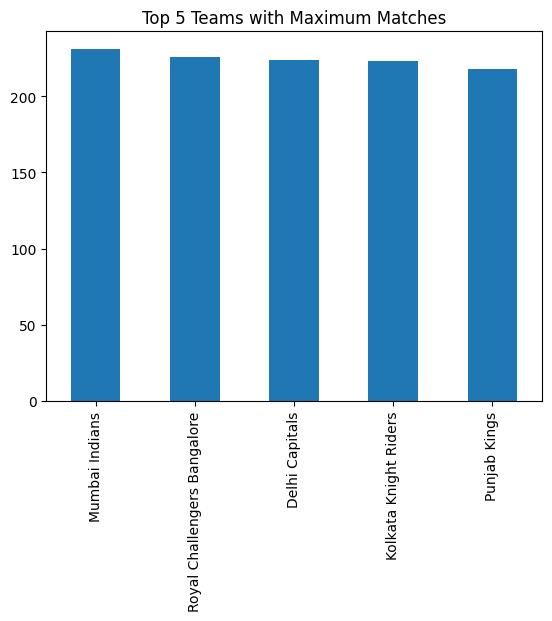

In [142]:
# code here

bar_chart_data =(ipl_data['Team1'].value_counts() + ipl_data['Team2'].value_counts()).sort_values(ascending= False).iloc[:5]

print(bar_chart_data)
bar_chart_data.plot(kind='bar',  title='Top 5 Teams with Maximum Matches')





### `Q-7:` Player who got Most no. of player of the match award playing against Mumbai Indians.
> Just for this question assume player of the match award is given to players from winning team. Although this is true in most of the cases.


In [144]:
ipl_data.head(3)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,Teams2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,NaN
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,NaN
2,1312198,Kolkata,2022-05-25,2022,Eliminator,Royal Challengers Bangalore,Lucknow Super Giants,"Eden Gardens, Kolkata",Lucknow Super Giants,field,...,Royal Challengers Bangalore,Runs,14.0,NaN,RM Patidar,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...",J Madanagopal,MA Gough,NaN


In [160]:
# code here

mi_matches = ipl_data[ (ipl_data['Team1'] == "Mumbai Indians") |  (ipl_data['Team2'] == "Mumbai Indians")] 

mi_matches[ ~(mi_matches["WinningTeam"] == "Mumbai Indians")]["Player_of_Match"].value_counts().head(3)

Player_of_Match
KL Rahul     4
SK Raina     4
SPD Smith    4
Name: count, dtype: int64

### `Q-8:` Team1 vs Team2 Dashbord
Create a function which will take two string(name of two teams) as input. Show win Loss record between them and player getting most player of the match award in matches between these two teams.
```
team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')
```

In [162]:
ipl_data.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,Teams2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,NaN
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,NaN


In [174]:
# code here

def team1_vs_team2(team1, team2):
    team1_vs_team2_matches = ipl_data[ (ipl_data['Team1'] == team1) & (ipl_data['Team2'] == team2)] 

    team1_matchWon = team1_vs_team2_matches.WinningTeam.value_counts().loc[team1]
    
    team2_matchWon = team1_vs_team2_matches.WinningTeam.value_counts().loc[team2]
    
    freq_potm =  ipl_data[ (ipl_data['Team1'] == team1) & (ipl_data['Team2'] == team2)]["Player_of_Match"].value_counts().iloc[[0]]
    
    
    print('{} wins {} matches.'.format(team1, team1_matchWon))
    print('{} wins {} matches.'.format(team2, team2_matchWon))
    print('Most frequent Player of the Match is {}.'.format(freq_potm))

team1_vs_team2('Kolkata Knight Riders','Chennai Super Kings')

Kolkata Knight Riders wins 5 matches.
Chennai Super Kings wins 9 matches.
Most frequent Player of the Match is Player_of_Match
RA Jadeja    2
Name: count, dtype: int64.


### `Q-9:` Find out the top 7 cities where the matches of Kolkata Knight Riders are played frequently and plot the result as bar chart.

*`.plot(kind = "bar")` can help you to plot the bar chart. Also you can learn more about this method from [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)*



In [178]:
ipl_data.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,Teams2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,NaN
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,NaN


City
Kolkata      74
Mumbai       23
Abu Dhabi    14
Chennai      12
Bangalore    11
Delhi        10
Pune          9
Name: count, dtype: int64


<Axes: title={'center': 'Top 7 Cities (KKR Played)'}, xlabel='City'>

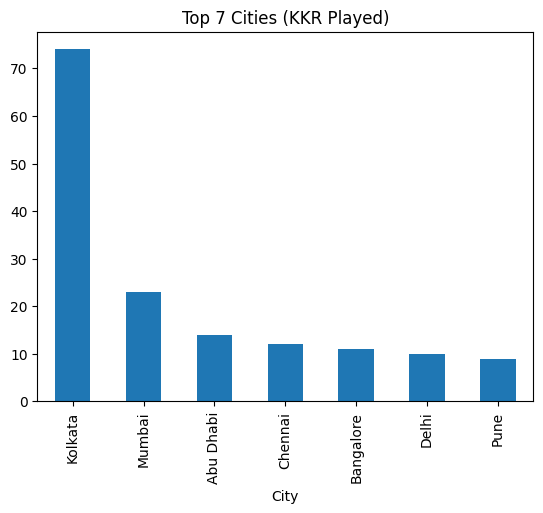

In [196]:
# code here

top_7_cities = ipl_data[ (ipl_data['Team1'] == "Kolkata Knight Riders") |  (ipl_data['Team2'] == "Kolkata Knight Riders")]['City'].value_counts().sort_values(ascending= False).iloc[0:7]

print(top_7_cities)

top_7_cities.plot(kind="bar", title='Top 7 Cities (KKR Played)')



### `Q-10:` Find out the average margin for the team Mumbai Indians for only the session 2011.

In [200]:
ipl_data.head(2)

,ID,City,Date,Season,MatchNumber,Team1,Team2,Venue,TossWinner,TossDecision,...,WinningTeam,WonBy,Margin,method,Player_of_Match,Team1Players,Team2Players,Umpire1,Umpire2,Teams2
0,1312200,Ahmedabad,2022-05-29,2022,Final,Rajasthan Royals,Gujarat Titans,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,bat,...,Gujarat Titans,Wickets,7.0,NaN,HH Pandya,"['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...","['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...",CB Gaffaney,Nitin Menon,NaN
1,1312199,Ahmedabad,2022-05-27,2022,Qualifier 2,Royal Challengers Bangalore,Rajasthan Royals,"Narendra Modi Stadium, Ahmedabad",Rajasthan Royals,field,...,Rajasthan Royals,Wickets,7.0,NaN,JC Buttler,"['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...","['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...",CB Gaffaney,Nitin Menon,NaN


In [265]:
# code here

mi_won_matches_in_2011 = ipl_data[ (ipl_data["WinningTeam"] == "Mumbai Indians") & (ipl_data["Season"] == "2011")]

average_margin = mi_won_matches_in_2011['Margin'].mean()
print("Average Margin for Mumbai Indians in 2011:", average_margin)

Average Margin for Mumbai Indians in 2011: 15.4


In [223]:
# Filter matches from season 2011 where Mumbai Indians were the winning team
mi_2011_wins = ipl_data[(ipl_data['Season'] == "2011") & (ipl_data['WinningTeam'] == 'Mumbai Indians')]

# Calculate the average margin
average_margin = mi_2011_wins['Margin'].mean()
print("Average Margin for Mumbai Indians in 2011:", average_margin)


Average Margin for Mumbai Indians in 2011: 15.4
